In [258]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os
import datetime

# to make this notebook's output stable across runs
np.random.seed(42)

# Need to set the PROJ_LIB environment variable either before
# starting your notebook or in python with :
os.environ['PROJ_LIB'] = '''/Users/atsoc/miniconda3/envs/TensorVenv/share/proj'''

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.basemap import Basemap

# Where to save the figures
PROJECT_ROOT_DIR = "."
PROJECT_NAME = "climate_change"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "Images" + '_' + PROJECT_NAME)
os.makedirs(IMAGES_PATH, exist_ok=True) # exist_ok avoid OSError error if directory exists already

# def save_fig(figure_id, tight_layout=True, fig_extension="png", resolution=300):
#     path = os.path.join(IMAGES_PATH, figure_id + "." + fig_extension)
#     print("Saving figure: \" ", figure_id, "\"")
#     if tight_layout:
#         plt.tight_layout()
#     plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
data_global_temperatures = pd.read_csv('data/GlobalTemperatures.csv')

In [4]:
data_global_temperatures.columns.to_list()[1:]

['LandAverageTemperature',
 'LandAverageTemperatureUncertainty',
 'LandMaxTemperature',
 'LandMaxTemperatureUncertainty',
 'LandMinTemperature',
 'LandMinTemperatureUncertainty',
 'LandAndOceanAverageTemperature',
 'LandAndOceanAverageTemperatureUncertainty']

In [5]:
data_global_temperatures.head(2)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data_global_temperatures.tail(2)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


In [7]:
# we can estimate the OceanAverageTemperature by substracting "LandAverageTemperature" from "LandAndOceanAverageTemperature"

data_global_temperatures["OceanAverageTemperature"] = data_global_temperatures["LandAndOceanAverageTemperature"] - data_global_temperatures["LandAverageTemperature"]
data_global_temperatures["OceanAverageTemperatureUncertainty"] = data_global_temperatures["LandAndOceanAverageTemperatureUncertainty"] + data_global_temperatures["LandAverageTemperatureUncertainty"]

In [8]:
data_global_temperatures

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,OceanAverageTemperature,OceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057,2.834,0.129
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058,4.050,0.137
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062,5.489,0.164
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063,7.819,0.182


In [9]:
def yearly_temperature_calculation(dataset): 
    dataset_columns =  dataset.columns.to_list()
    yearly_columns = ['Year'] + ['Yearly' + column for column in dataset_columns[1:]]

    yearly_dataset = pd.DataFrame(columns=yearly_columns)

    for year in range(1750, 2015 + 1, 1):
            yearly_dataset.loc[year,['Year']] = year

    for i in range(1,len(yearly_columns),1):
        for year in range(1750, 2015 + 1, 1):
            yearly_dataset.loc[year,[yearly_columns[i]]] = dataset[dataset['dt'].str.contains(str(year))][dataset_columns[i]].mean()

    yearly_dataset = yearly_dataset.astype(float)
    yearly_dataset['Year'] = yearly_dataset['Year'].astype(int)
    return yearly_dataset

data_global_yearly_temperatures = yearly_temperature_calculation(data_global_temperatures)

In [10]:
data_global_yearly_temperatures

,Year,YearlyLandAverageTemperature,YearlyLandAverageTemperatureUncertainty,YearlyLandMaxTemperature,YearlyLandMaxTemperatureUncertainty,YearlyLandMinTemperature,YearlyLandMinTemperatureUncertainty,YearlyLandAndOceanAverageTemperature,YearlyLandAndOceanAverageTemperatureUncertainty,YearlyOceanAverageTemperature,YearlyOceanAverageTemperatureUncertainty
1750,1750,8.719364,2.637818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1751,1751,7.976143,2.781143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1752,1752,5.779833,2.977000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1753,1753,8.388083,3.176000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1754,1754,8.469333,3.494250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2011,2011,9.516000,0.082000,15.284833,0.114333,3.827667,0.136583,15.769500,0.059000,6.253500,0.141000
2012,2012,9.507333,0.083417,15.332833,0.107333,3.756167,0.145333,15.802333,0.061500,6.295000,0.144917
2013,2013,9.606500,0.097667,15.373833,0.115500,3.911333,0.149833,15.854417,0.064667,6.247917,0.162333
2014,2014,9.570667,0.090167,15.313583,0.111667,3.877750,0.139000,15.913000,0.063167,6.342333,0.153333


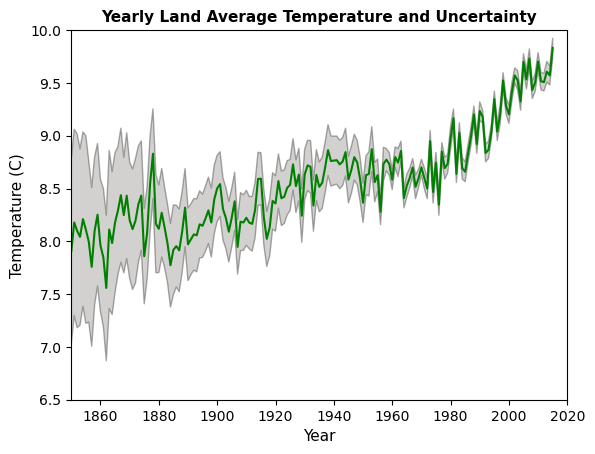

In [11]:
plt.plot(data_global_yearly_temperatures['Year'],data_global_yearly_temperatures['YearlyLandAverageTemperature'],'g')
plt.fill_between(data_global_yearly_temperatures['Year'], data_global_yearly_temperatures['YearlyLandAverageTemperature'] - data_global_yearly_temperatures['YearlyLandAverageTemperatureUncertainty'], data_global_yearly_temperatures['YearlyLandAverageTemperature'] + data_global_yearly_temperatures['YearlyLandAverageTemperatureUncertainty'], alpha=0.5, edgecolor='#545251', facecolor='#a8a4a2')
plt.xlim([1850,2020])
plt.ylim([6.5,10])
plt.xlabel('Year', fontsize=11)
plt.ylabel('Temperature (C)', fontsize=11)
plt.title('Yearly Land Average Temperature and Uncertainty', fontsize=11, fontweight="bold")
plt.show()

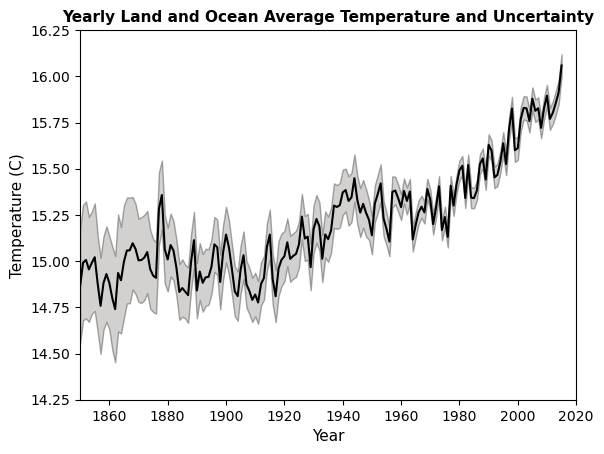

In [12]:
plt.plot(data_global_yearly_temperatures['Year'],data_global_yearly_temperatures['YearlyLandAndOceanAverageTemperature'],'k')
plt.fill_between(data_global_yearly_temperatures['Year'], data_global_yearly_temperatures['YearlyLandAndOceanAverageTemperature'] - data_global_yearly_temperatures['YearlyLandAndOceanAverageTemperatureUncertainty'], data_global_yearly_temperatures['YearlyLandAndOceanAverageTemperature'] + data_global_yearly_temperatures['YearlyLandAndOceanAverageTemperatureUncertainty'], alpha=0.5, edgecolor='#545251', facecolor='#a8a4a2')
plt.xlim([1850,2020])
plt.ylim([14.25,16.25])
plt.xlabel('Year', fontsize=11)
plt.ylabel('Temperature (C)', fontsize=11)
plt.title('Yearly Land and Ocean Average Temperature and Uncertainty', fontsize=11, fontweight="bold")
plt.show()

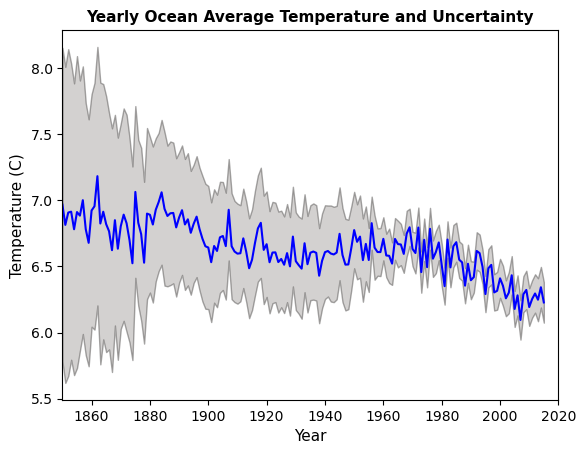

In [13]:
plt.plot(data_global_yearly_temperatures['Year'],data_global_yearly_temperatures['YearlyOceanAverageTemperature'],'b')
plt.fill_between(data_global_yearly_temperatures['Year'], data_global_yearly_temperatures['YearlyOceanAverageTemperature'] - data_global_yearly_temperatures['YearlyOceanAverageTemperatureUncertainty'], data_global_yearly_temperatures['YearlyOceanAverageTemperature'] + data_global_yearly_temperatures['YearlyOceanAverageTemperatureUncertainty'], alpha=0.5, edgecolor='#545251', facecolor='#a8a4a2')
plt.xlim([1850,2020])
plt.xlabel('Year', fontsize=11)
plt.ylabel('Temperature (C)', fontsize=11)
plt.title('Yearly Ocean Average Temperature and Uncertainty', fontsize=11, fontweight="bold")
plt.show()

In [14]:
data_global_yearly_temperatures.loc[1951:1980,['YearlyLandAndOceanAverageTemperature']].mean()[0]

15.299547222222223

In [15]:
global_Yearly_temperature_1951_1980_avg = data_global_yearly_temperatures.loc[1951:1980,['YearlyLandAndOceanAverageTemperature']].mean()

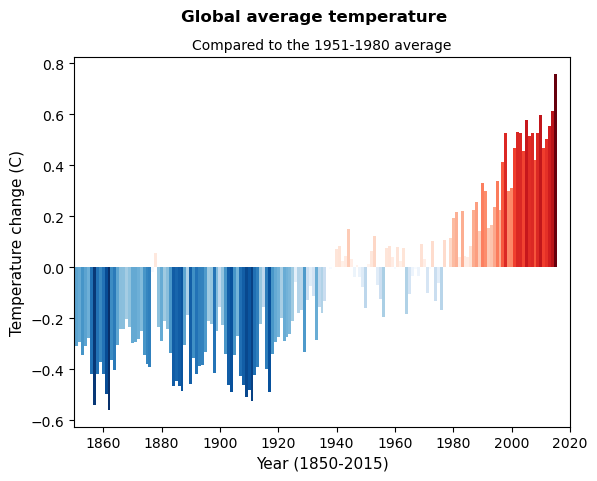

In [16]:
global_Yearly_temperature_1951_1980_avg = data_global_yearly_temperatures.loc[1951:1980,['YearlyLandAndOceanAverageTemperature']].mean()[0]

pos_cmap = plt.get_cmap("Reds")
neg_cmap = plt.get_cmap("Blues_r")

x = data_global_yearly_temperatures['Year'].loc[1850:]
y = data_global_yearly_temperatures['YearlyLandAndOceanAverageTemperature'].loc[1850:]-global_Yearly_temperature_1951_1980_avg

positive_mask = y > 0
negative_mask = y <= 0

rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))


plt.bar(x[positive_mask], y[positive_mask], width=1, color=pos_cmap(rescale(y[positive_mask])), linewidth=0.01)
plt.bar(x[negative_mask], y[negative_mask], width=1, color=neg_cmap(rescale(y[negative_mask])), linewidth=0.01)
plt.xlabel('Year (1850-2015)', fontsize = 11)
plt.xlim([1850,2020])
plt.ylabel('Temperature change (C)', fontsize = 11)
plt.suptitle('Global average temperature', fontsize=12, fontweight="bold")
plt.title('Compared to the 1951-1980 average', fontsize=10)
plt.show()

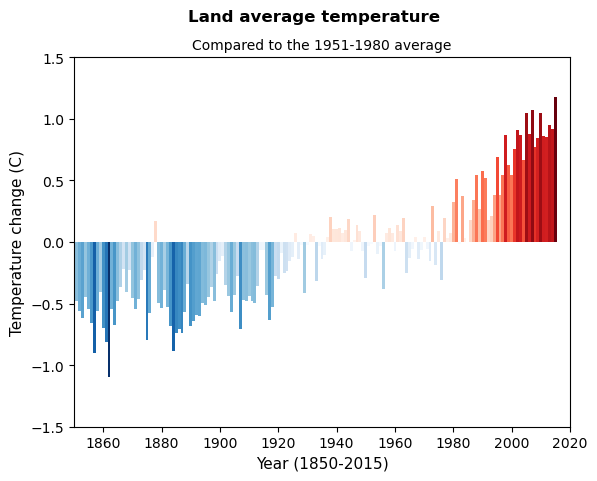

In [17]:
land_Yearly_temperature_1951_1980_avg = data_global_yearly_temperatures.loc[1951:1980,['YearlyLandAverageTemperature']].mean()[0]

pos_cmap = plt.get_cmap("Reds")
neg_cmap = plt.get_cmap("Blues_r")

x = data_global_yearly_temperatures['Year'].loc[1850:]
y = data_global_yearly_temperatures['YearlyLandAverageTemperature'].loc[1850:]-land_Yearly_temperature_1951_1980_avg

positive_mask = y > 0
negative_mask = y <= 0

rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

plt.bar(x[positive_mask], y[positive_mask], width=1, color=pos_cmap(rescale(y[positive_mask])), linewidth=0.01)
plt.bar(x[negative_mask], y[negative_mask], width=1, color=neg_cmap(rescale(y[negative_mask])), linewidth=0.01)
plt.xlabel('Year (1850-2015)', fontsize = 11)
plt.ylabel('Temperature change (C)', fontsize = 11)
plt.xlim([1850,2020])
plt.ylim([-1.5,1.5])
plt.suptitle('Land average temperature', fontsize=12, fontweight="bold")
plt.title('Compared to the 1951-1980 average', fontsize=10)
plt.show()

# TO DO List:
* Plot a simple graph of temperature as the funciton of the year - [DONE]
* Estimate annual average - [DONE]
* Create a new data column of purely ocean temprature by substracting Land from Ocean+Land also measure
    * What to do with the uncertainty ? 
* Compare the yearly temperature increase of Land, Ocean and Global
* Time series ? can we extrapolate the global temperature to the future with different predictions ?
    * Pessimistic and Optimistic situation

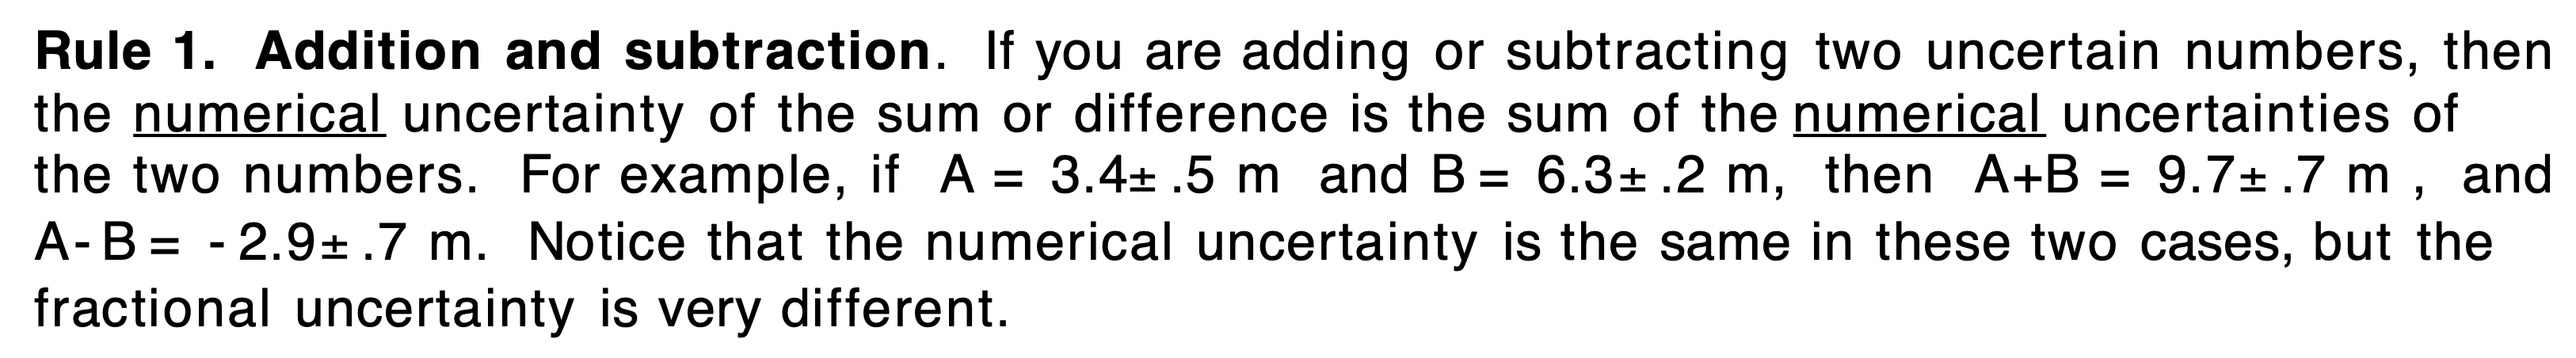

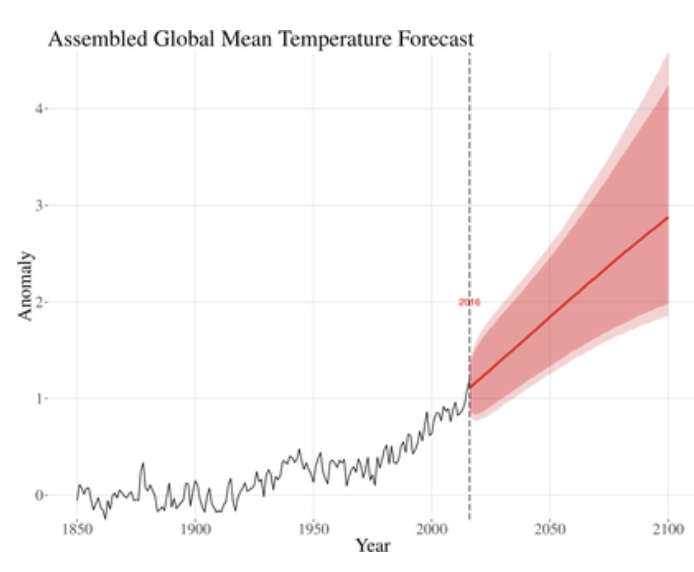

### Time Series Forecasting

In [18]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA # from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [19]:
ts = data_global_temperatures[['dt', 'LandAndOceanAverageTemperature']]

In [213]:
data_temperature_ts = pd.Series(ts['LandAndOceanAverageTemperature'][1800:].values, index = pd.to_datetime(ts['dt'][1800:]))

In [214]:
data_temperature_ts.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 1392 entries, 1900-01-01 to 2015-12-01
Series name: None
Non-Null Count  Dtype  
--------------  -----  
1392 non-null   float64
dtypes: float64(1)
memory usage: 21.8 KB


In [218]:
data_temperature_ts.isnull().sum()

0

In [219]:
rolmean = data_temperature_ts.rolling(window=12).mean()
rolstd = data_temperature_ts.rolling(window=12).std()

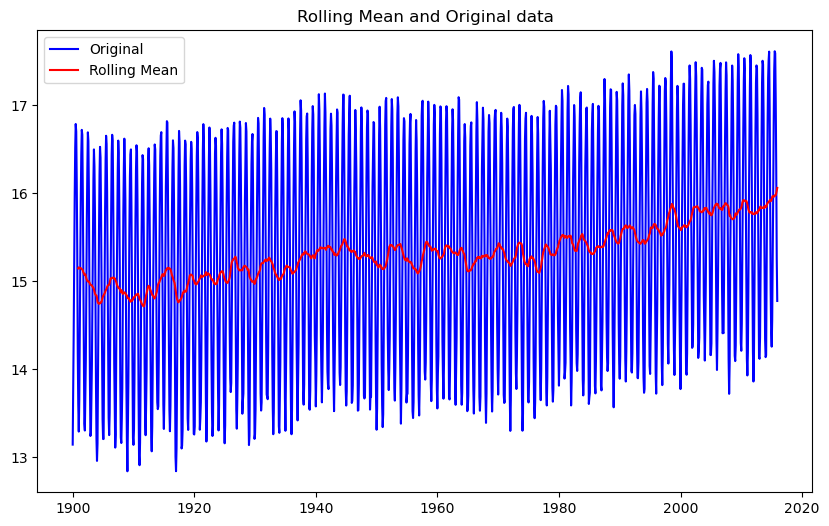

In [220]:
#Plot rolling statistics
plt.plot(data_temperature_ts, color='blue', label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean and Original data')
# plt.ylim([1, 1.5])
# plt.xlim(['1985-01-01','2015-12-01'])
plt.show(block=False)

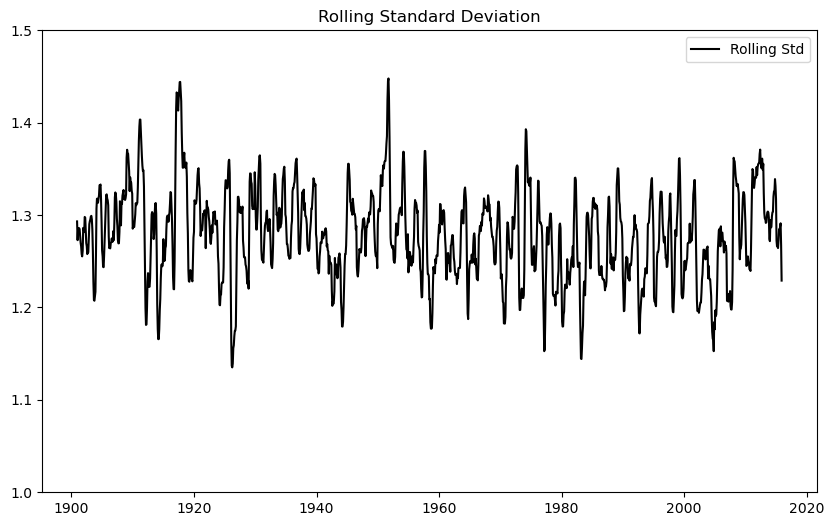

In [221]:
plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Standard Deviation')
plt.ylim([1, 1.5])
# plt.xlim(['1985-01-01','2015-12-01'])
plt.show(block=False)

From the above graphs, we see that rolling mean itself has a trend component even though rolling standard deviation is constant with time.

In [222]:
print('Results of Dickey Fuller Test:')
dftest = adfuller(data_temperature_ts, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                   -0.361080
p-value                           0.916397
#Lags Used                       24.000000
Number of Observations Used    1367.000000
Critical Value (1%)              -3.435143
Critical Value (5%)              -2.863657
Critical Value (10%)             -2.567897
dtype: float64


For a Time series to be stationary, its ADCF test should have:

p-value to be low (according to the null hypothesis)
The critical values at 1%,5%,10% confidence intervals should be as close as possible to the Test Statistics
From the above ADCF test result, we see that p-value(at max can be 1.0) is very large. Also critical values are no where close to the Test Statistics. Hence, we can safely say that our Time Series at the moment is not stationary

#### Data Transformation to achieve Stationarity 
There are a couple of ways to achieve stationarity through data transformation like taking  log10 , loge , square, square root, cube, cube root, exponential decay, time shift and so on ...

In our notebook, lets start of with log transformations. Our objective is to remove the trend component. Hence, flatter curves( ie: paralle to x-axis) for time series and rolling mean after taking log would say that our data transformation did a good job.

In [223]:
data_temperature_ts

dt
1900-01-01    13.142
1900-02-01    13.777
1900-03-01    14.400
1900-04-01    15.170
1900-05-01    15.955
               ...  
2015-08-01    17.589
2015-09-01    17.049
2015-10-01    16.290
2015-11-01    15.252
2015-12-01    14.774
Length: 1392, dtype: float64

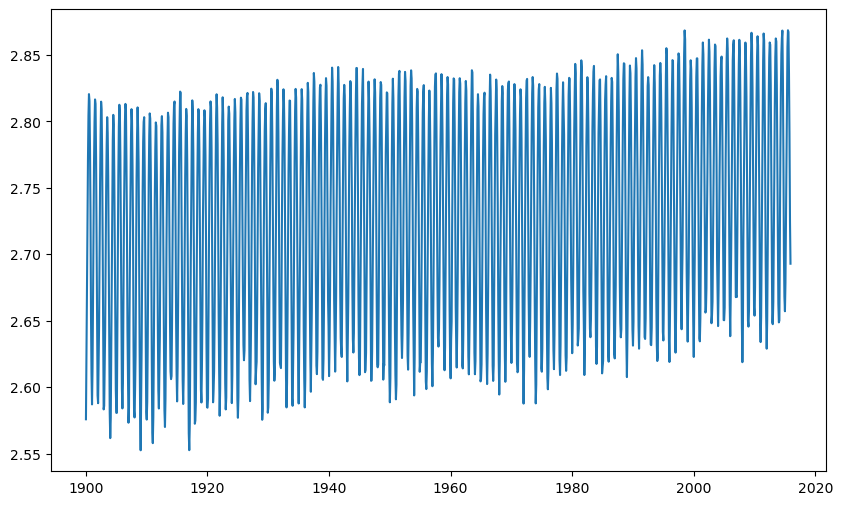

In [224]:
# Log Scale Transformation (estimating trend)
indexedDataset_logScale = np.log(data_temperature_ts)
plt.plot(indexedDataset_logScale)

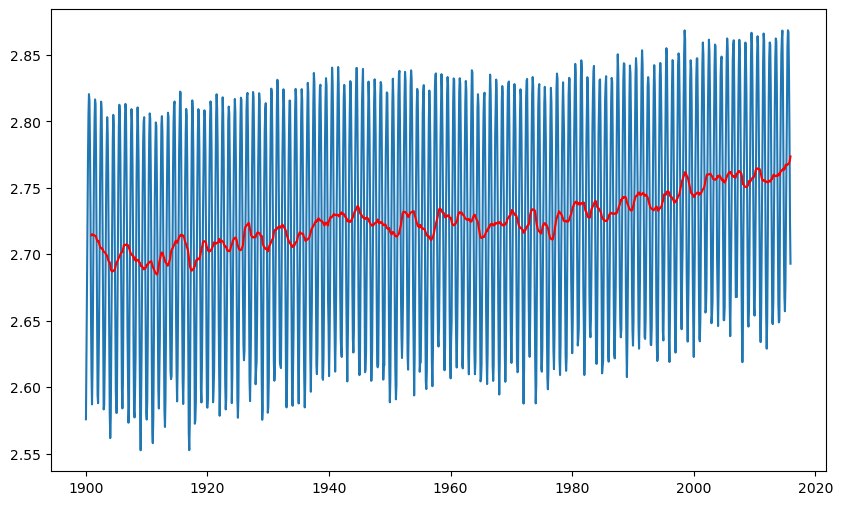

In [225]:
#The below transformation is required to make series stationary
movingAverage = indexedDataset_logScale.rolling(window=12).mean() # we choose 12 as there are 12 months in a year
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')


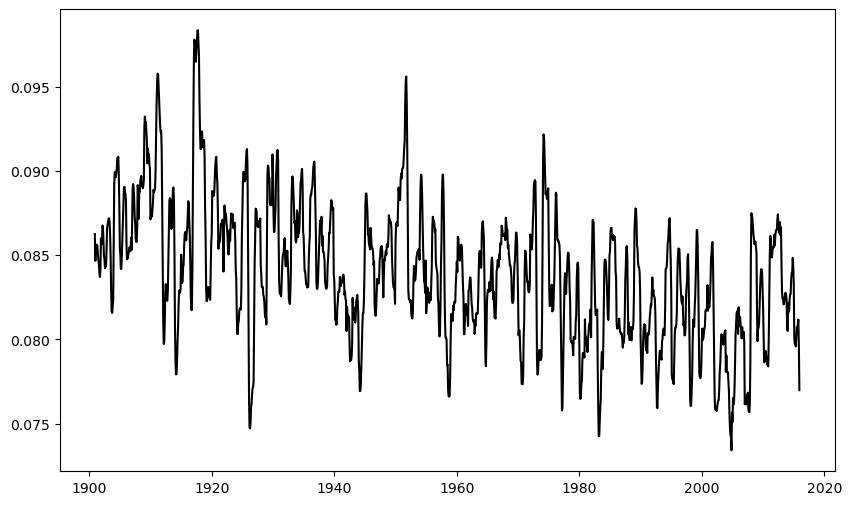

In [226]:
plt.plot(movingSTD, color='k')

In [227]:
movingAverage

dt
1900-01-01         NaN
1900-02-01         NaN
1900-03-01         NaN
1900-04-01         NaN
1900-05-01         NaN
                ...   
2015-08-01    2.767799
2015-09-01    2.768161
2015-10-01    2.769507
2015-11-01    2.771459
2015-12-01    2.773538
Length: 1392, dtype: float64

In [228]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

datasetLogScaleMinusMovingAverage.dropna(inplace=True) #Remove NAN values
datasetLogScaleMinusMovingAverage.drop(index=datasetLogScaleMinusMovingAverage.index[0], axis=0, inplace=True) # drop the First row

datasetLogScaleMinusMovingAverage.head(12)

dt
1901-01-01   -0.128134
1901-02-01   -0.099963
1901-03-01   -0.048290
1901-04-01    0.008000
1901-05-01    0.054069
1901-06-01    0.085641
1901-07-01    0.102682
1901-08-01    0.099567
1901-09-01    0.059665
1901-10-01    0.002413
1901-11-01   -0.064657
1901-12-01   -0.115795
dtype: float64

In [229]:
indexedDataset_logScale

dt
1900-01-01    2.575813
1900-02-01    2.623001
1900-03-01    2.667228
1900-04-01    2.719320
1900-05-01    2.769772
                ...   
2015-08-01    2.867274
2015-09-01    2.836092
2015-10-01    2.790551
2015-11-01    2.724711
2015-12-01    2.692869
Length: 1392, dtype: float64

In [230]:
adfuller(datasetLogScaleMinusMovingAverage, autolag='AIC')

(-8.017856782012517,
 2.1150408003554404e-12,
 24,
 1355,
 {'1%': -3.4351852261663867,
  '5%': -2.863675384893896,
  '10%': -2.5679068804891},
 -9623.109526033493)

In [231]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [232]:
datasetLogScaleMinusMovingAverage

dt
1901-01-01   -0.128134
1901-02-01   -0.099963
1901-03-01   -0.048290
1901-04-01    0.008000
1901-05-01    0.054069
                ...   
2015-08-01    0.099475
2015-09-01    0.067930
2015-10-01    0.021044
2015-11-01   -0.046748
2015-12-01   -0.080669
Length: 1380, dtype: float64

In [233]:
datasetLogScaleMinusMovingAverage

dt
1901-01-01   -0.128134
1901-02-01   -0.099963
1901-03-01   -0.048290
1901-04-01    0.008000
1901-05-01    0.054069
                ...   
2015-08-01    0.099475
2015-09-01    0.067930
2015-10-01    0.021044
2015-11-01   -0.046748
2015-12-01   -0.080669
Length: 1380, dtype: float64

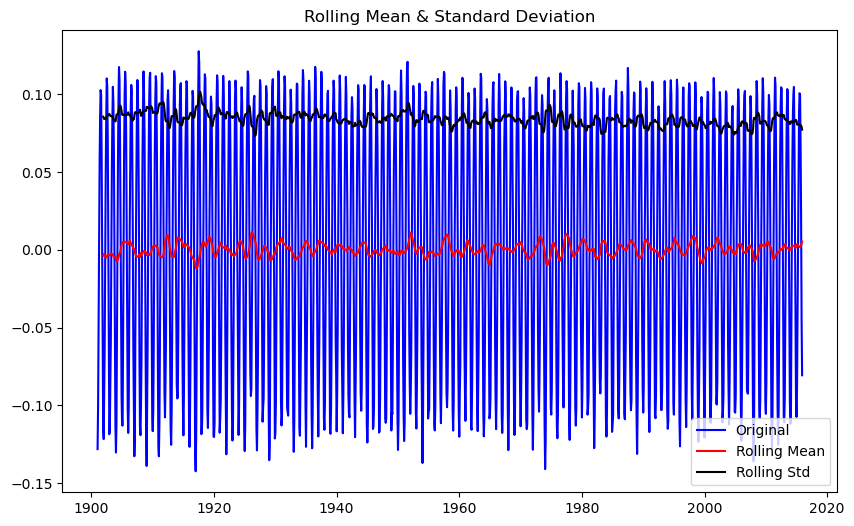

Results of Dickey Fuller Test:
Test Statistic                -8.017857e+00
p-value                        2.115041e-12
#Lags Used                     2.400000e+01
Number of Observations Used    1.355000e+03
Critical Value (1%)           -3.435185e+00
Critical Value (5%)           -2.863675e+00
Critical Value (10%)          -2.567907e+00
dtype: float64


In [234]:
test_stationarity(datasetLogScaleMinusMovingAverage)

1. p-value has reduced from 0.91 to 1.26e-12 (very good!)
2. The critical values at 1%, 5%, 10% confidence intervals are pretty far to the Test Statistic. Worst than before.

#### Exponential Decay Transformation

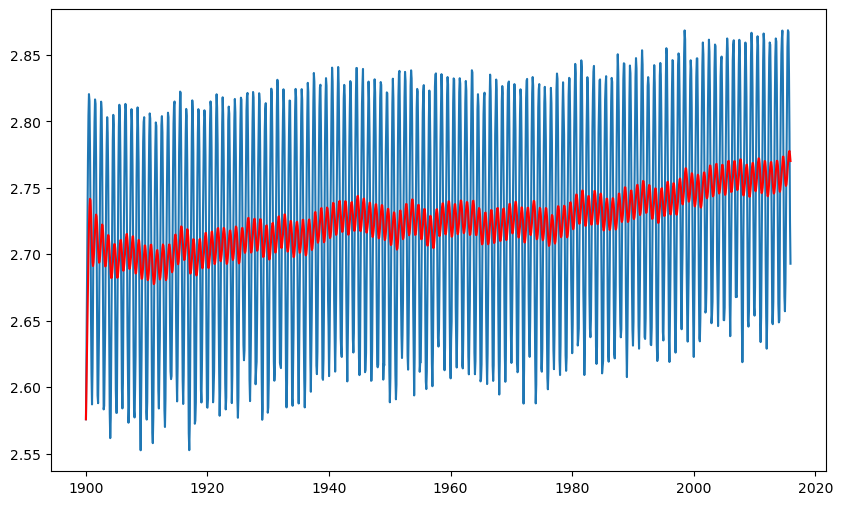

In [235]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

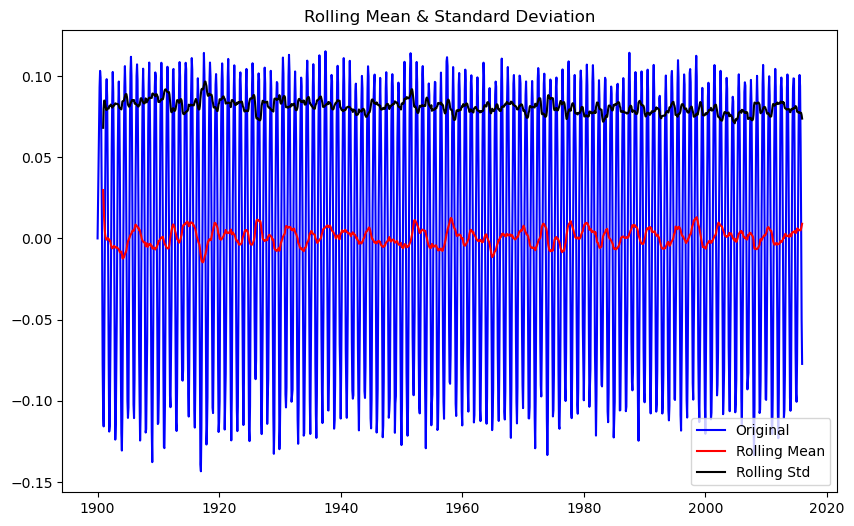

Results of Dickey Fuller Test:
Test Statistic                -6.954610e+00
p-value                        9.499463e-10
#Lags Used                     2.400000e+01
Number of Observations Used    1.367000e+03
Critical Value (1%)           -3.435143e+00
Critical Value (5%)           -2.863657e+00
Critical Value (10%)          -2.567897e+00
dtype: float64


In [236]:
datasetLogScaleMinusExponentialMovingAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusExponentialMovingAverage)

#### Time Shift Transformation

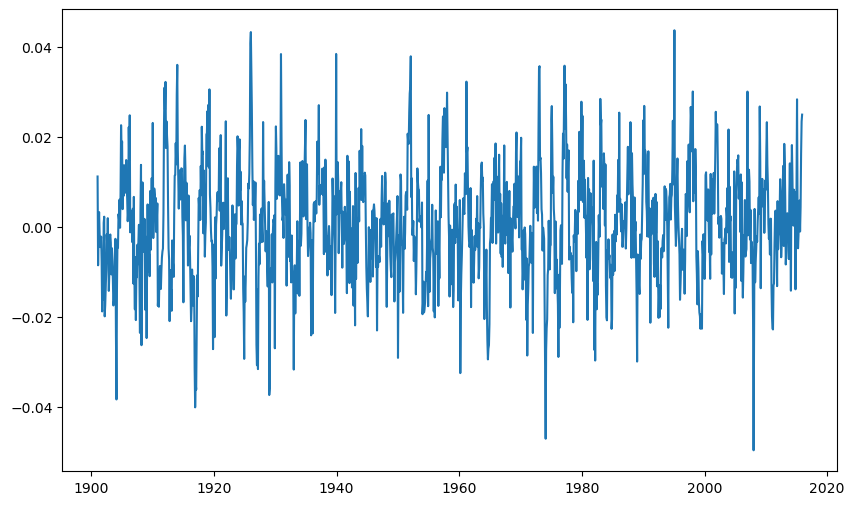

In [237]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift(12)
datasetLogDiffShifting.dropna(inplace=True) #Remove NAN values
plt.plot(datasetLogDiffShifting)

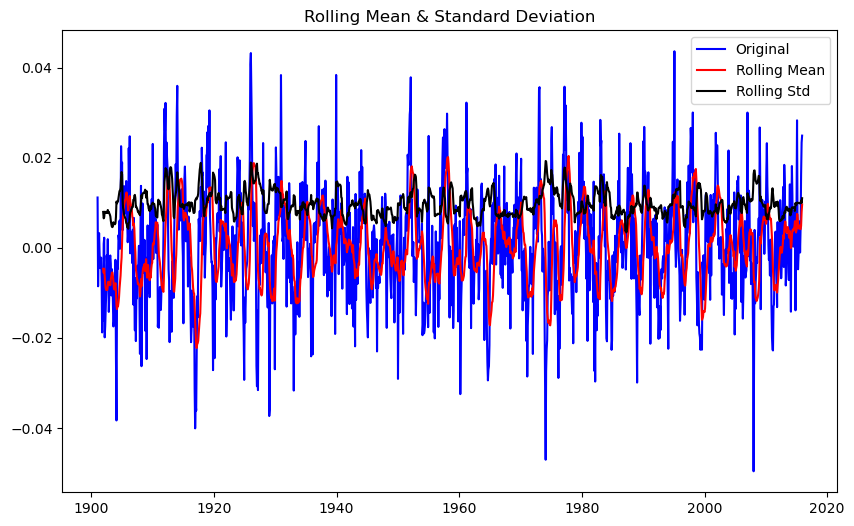

Results of Dickey Fuller Test:
Test Statistic                -9.820873e+00
p-value                        5.342514e-17
#Lags Used                     2.400000e+01
Number of Observations Used    1.355000e+03
Critical Value (1%)           -3.435185e+00
Critical Value (5%)           -2.863675e+00
Critical Value (10%)          -2.567907e+00
dtype: float64


In [238]:
test_stationarity(datasetLogDiffShifting)

The p-value is very less than the significance level of 0.05 and hence we can reject the null hypothesis and take that the series is stationary.

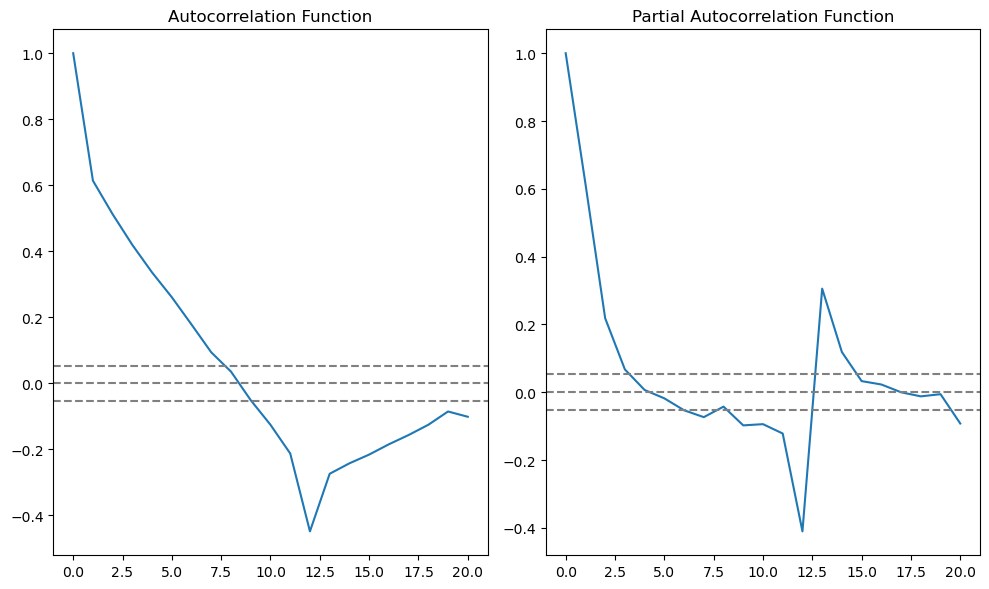

In [239]:
#ACF & PACF plots

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
# plt.xlim([7.5, 10])
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
# plt.xlim([2.5, 5])
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()            

From the ACF graph, we see that curve touches y=0.0 line at x=9. Thus, from theory, Q = 9 From the PACF graph, we see that curve touches y=0.0 line at x=4. Thus, from theory, P = 4

In [240]:
datasetLogDiffShifting

dt
1901-01-01    0.011199
1901-02-01   -0.008529
1901-03-01   -0.001181
1901-04-01    0.003291
1901-05-01   -0.001192
                ...   
2015-08-01   -0.001023
2015-09-01    0.004350
2015-10-01    0.016152
2015-11-01    0.023417
2015-12-01    0.024946
Length: 1380, dtype: float64

/Users/atsoc/miniconda3/envs/TensorVenv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/atsoc/miniconda3/envs/TensorVenv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/atsoc/miniconda3/envs/TensorVenv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/atsoc/miniconda3/envs/TensorVenv/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Plotting ARIMA model


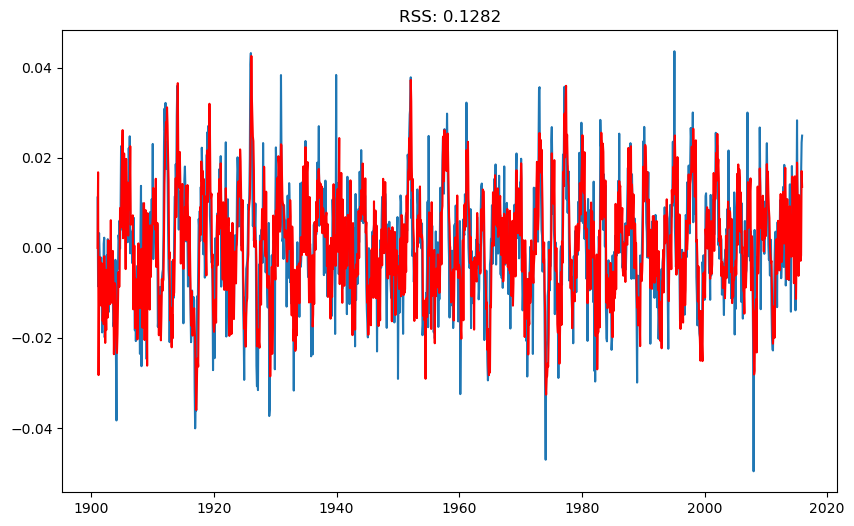

In [241]:
#AR Model
#making order=(2,1,0) gives RSS=1.5023
model = ARIMA(datasetLogDiffShifting, order=(4,2,9))
results_ARIMA = model.fit()
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
# plt.ylim([2.5,2.9])
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - datasetLogDiffShifting)**2))
print('Plotting ARIMA model')

Lower RSS values indicate a better model.

#### Prediction & Reverse transformations 

In [242]:
results_ARIMA.fittedvalues

dt
1901-01-01    0.000000
1901-02-01    0.016798
1901-03-01   -0.028256
1901-04-01   -0.011312
1901-05-01   -0.002025
                ...   
2015-08-01    0.005877
2015-09-01   -0.002869
2015-10-01   -0.001623
2015-11-01    0.017078
2015-12-01    0.013571
Length: 1380, dtype: float64

In [243]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

dt
1901-01-01    0.000000
1901-02-01    0.016798
1901-03-01   -0.028256
1901-04-01   -0.011312
1901-05-01   -0.002025
dtype: float64


In [244]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

dt
1901-01-01    0.000000
1901-02-01    0.016798
1901-03-01   -0.011458
1901-04-01   -0.022770
1901-05-01   -0.024795
                ...   
2015-08-01    0.531983
2015-09-01    0.529115
2015-10-01    0.527491
2015-11-01    0.544569
2015-12-01    0.558140
Length: 1380, dtype: float64


In [245]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale.iloc[0], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

dt
1900-01-01    2.575813
1900-02-01    2.575813
1900-03-01    2.575813
1900-04-01    2.575813
1900-05-01    2.575813
dtype: float64

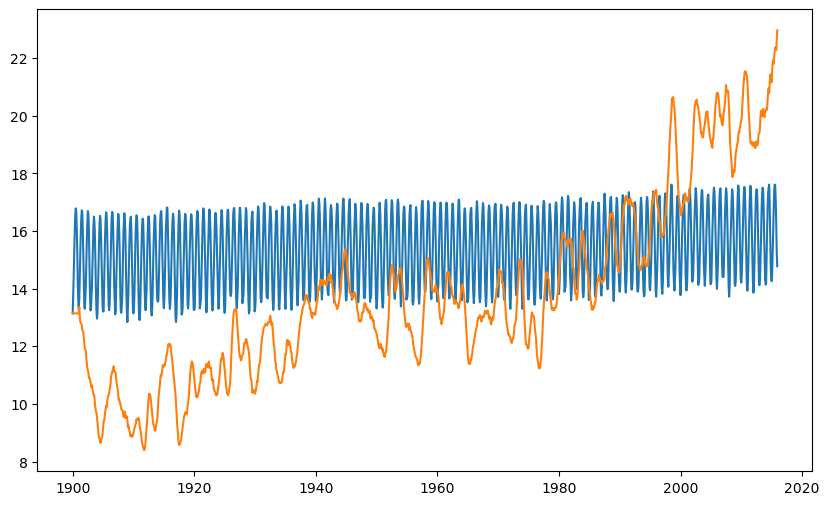

In [246]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data_temperature_ts)
plt.plot(predictions_ARIMA)

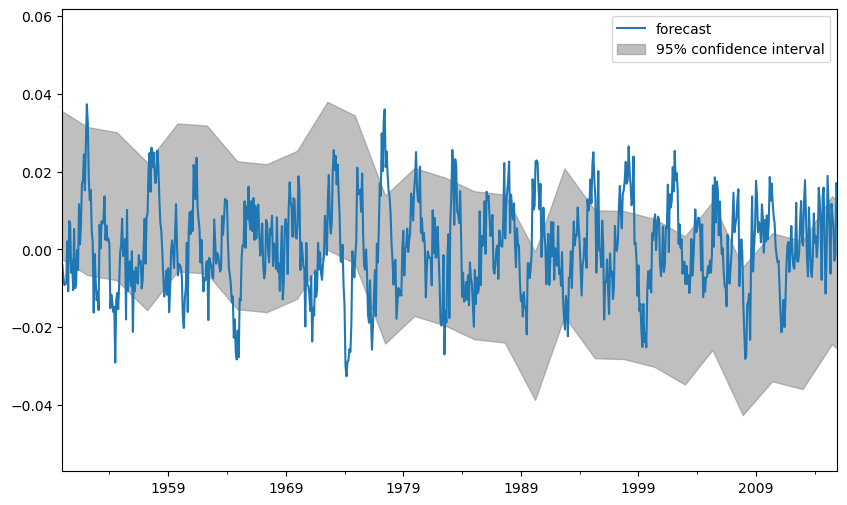

In [247]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(results_ARIMA, '1950', '2015')
plt.show()

#### new attempt

In [248]:
indexedDataset_logScale

dt
1900-01-01    2.575813
1900-02-01    2.623001
1900-03-01    2.667228
1900-04-01    2.719320
1900-05-01    2.769772
                ...   
2015-08-01    2.867274
2015-09-01    2.836092
2015-10-01    2.790551
2015-11-01    2.724711
2015-12-01    2.692869
Length: 1392, dtype: float64

/Users/atsoc/miniconda3/envs/TensorVenv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/atsoc/miniconda3/envs/TensorVenv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/atsoc/miniconda3/envs/TensorVenv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Plotting AR model


/Users/atsoc/miniconda3/envs/TensorVenv/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


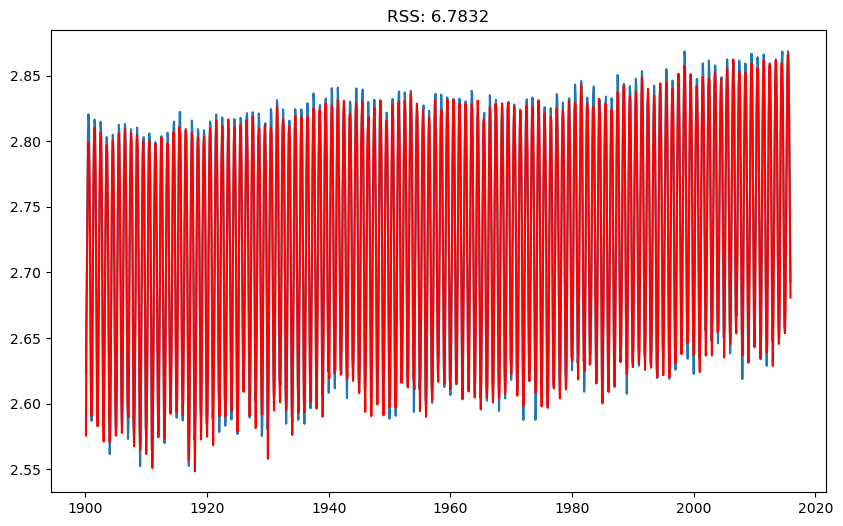

In [249]:
model = ARIMA(indexedDataset_logScale, order=(2,1,2))
results_ARIMA = model.fit()
plt.plot(indexedDataset_logScale[1:])
plt.plot(results_ARIMA.fittedvalues[1:], color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - indexedDataset_logScale)**2))
print('Plotting AR model')

In [250]:
# Forecast
model_fit = ARIMA(indexedDataset_logScale, order=(1,2,1)).fit()
forecast = model_fit.get_forecast(steps=5*12)
forecasts_and_intervals = forecast.summary_frame(alpha=0.05)

/Users/atsoc/miniconda3/envs/TensorVenv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/atsoc/miniconda3/envs/TensorVenv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/atsoc/miniconda3/envs/TensorVenv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Plotting AR model


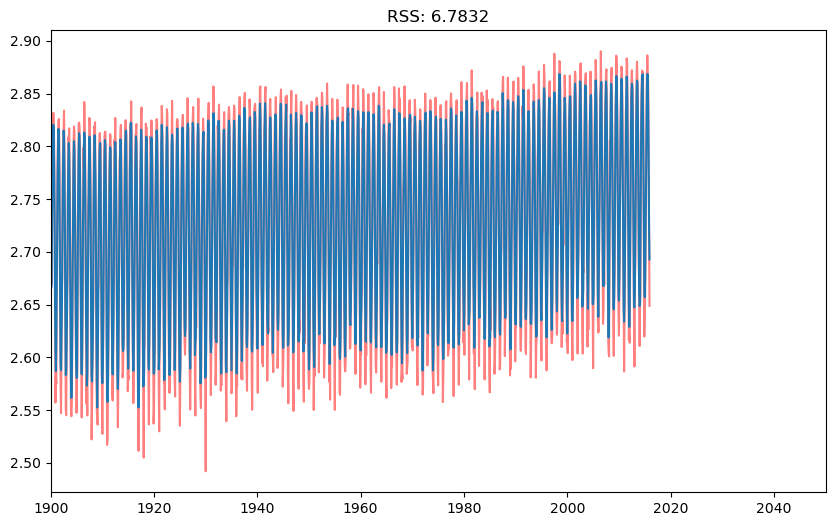

In [257]:
plt.plot(model_fit.fittedvalues[2:], color='red', alpha = 0.5)
plt.plot(indexedDataset_logScale[2:])
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - indexedDataset_logScale)**2))
plt.xlim([datetime.date(1900, 1, 1), datetime.date(2050, 1, 12)])
print('Plotting AR model')

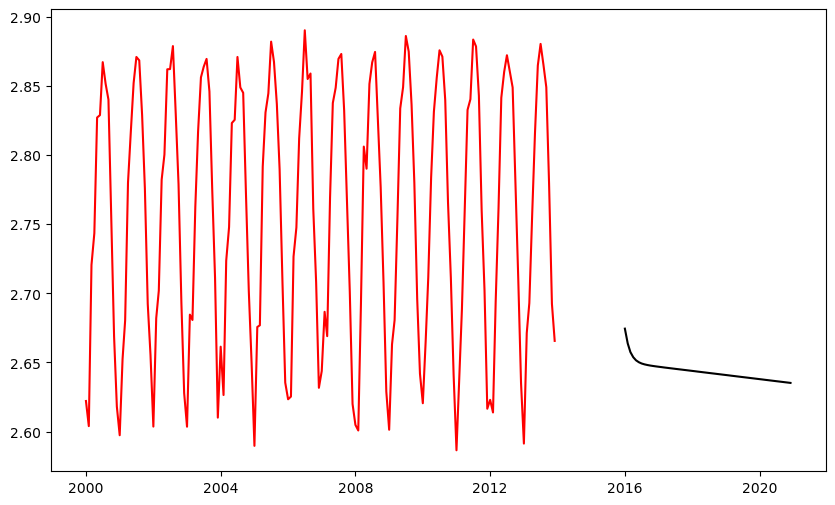

In [260]:
# plt.plot(indexedDataset_logScale)
plt.plot(model_fit.predict(start='2000', end='2013'), color='r')
# plt.plot(model_fit.predict(start='2016', end='2050'))
plt.plot(forecasts_and_intervals["mean"], color='k')
# plt.fill_between(forecasts_and_intervals.index, forecasts_and_intervals["mean_ci_lower"], forecasts_and_intervals["mean_ci_upper"], color='k', alpha=.15)
plt.show()